<h1 style="color:purple; background:yellow; line-height:3; text-align:center">📊 START-UP ACQUISITION STATUS PREDICTION 📊</h1>
<h4 style="color:red; text-align:right">By: Mr. Suraj Honkamble</h4>

<h2 style="color:blue; background:lightblue;line-height:2; text-align:center;">Table of Content: 🎡🎡</h2>
<h3 style="color:magenta; line-height:1.7;">1. Objective of the Project<br>
    2. Data info<br>
    3. Loading the packages or libraries<br>
    4. Loading the dataset<br>
    5. Understandng our data<br>
    6. Data Cleaning<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Delete irrelevant & redundant information<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Remove noise or unreliable data (duplicate, missing values and outliers).<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iii. Data Transformation<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iv. Feature Creation<br>
    7. Exploratory Data Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Univariate Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Bivariate Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iii. Multivariate Analysis<br></h3>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Objective of the Project: 🎯🎯</h2>
<h3 style="color:green; line-height:1.2;"> The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.</h3>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Data Info: 📰📰</h2>
<h3 style="color:green; line-height:1.5;">There are 196562 rows and 44 columns out of which will be used as features. The rest provide more information about the data, but will not be used for model training (like normalized name, entity id, short description etc.)<br><br>
    <b style="color:red"> 1. entity_type : </b> Type of company.<br>
    <b style="color:red"> 2. entity_id : </b> Unique Id for each entity.<br>
    <b style="color:red"> 3. name : </b> Name of the entity or company.<br>
    <b style="color:red"> 4. category_code : </b> Type of company.<br>
    <b style="color:red"> 5. status : </b> Status of the company, whether it is operating or not and this is our target variable.<br>
    <b style="color:red"> 6. founded_at : </b> Company foundation yera.<br>
    <b style="color:red"> 7. closed_at : </b> Company shut-down year.<br>
    <b style="color:red"> 8. country_code, state_code, city, region : </b> Country, State, City and region which the company located at.<br>
    <b style="color:red"> 9. first_investment_at, last_investment_at : </b> First and Last Investment Dates.<br>
    <b style="color:red"> 10. investment_rounds : </b> Count of Investment rounds take place.<br>
    <b style="color:red"> 11. invested_companies : </b> Count of companies who are invested in this company.<br>
    <b style="color:red"> 12. first_funding_at, last_funding_at : </b> First and Last funding date.<br>
    <b style="color:red"> 13. funding_rounds : </b> Count of funding rounds.<br>
    <b style="color:red"> 14. funding_total_usd : </b> Amount of total funding in US Dollar.<br>
    <b style="color:red"> 15. first_milestone_at, last_milestone_at : </b> Date on which company achieved their first and last targeted milestone.<br>
    <b style="color:red"> 16. milestones : </b> Number of milestones achieved by each company.<br>
    <b style="color:red"> 17. relationships : </b> Number of relations company has with various stackholders.<br>
    <b style="color:red"> 18. created_by : </b> Company Creator name.<br>
    <b style="color:red"> 19. created_at, updated_at : </b> Company Created and Updated dates.<br>
    <b style="color:red"> 20. lat, lng : </b> Latitude and Longitude of the company location.<br>
    <b style="color:red"> 21. ROI : </b> Return of Investment.<br>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Import required libraries 📕📗</h2>

In [1]:
# Data loading and manipulating libraries
import pandas as pd
import numpy as np

# Set column visibility to 50, because our dataset contains 44 column
pd.set_option('display.max_columns', 50)

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avoiding uncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Train Test Split
from sklearn.model_selection import train_test_split

# Feature Engineering-Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Classification Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center">Loading the dataset 📂📂</h2>

In [142]:
df=pd.read_csv('Data/companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center">Understanding Our Data 👁📰

In [3]:
df.shape

(196553, 44)

In [4]:
df.size

8648332

In [5]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

### Descriptive statistics

In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,196553.0,98276.00,56740.11,0.00,49138.00,98276.00,147414.00,1.965520e+05
entity_id,196553.0,153006.23,90209.25,1.00,59850.00,174539.00,232655.00,2.862150e+05
parent_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logo_width,110110.0,459.13,594.98,1.00,192.00,267.00,484.00,1.820000e+04
logo_height,110110.0,222.73,333.09,1.00,70.00,105.00,232.00,9.600000e+03
investment_rounds,2591.0,2.37,12.17,1.00,1.00,1.00,1.00,4.780000e+02
invested_companies,2591.0,2.20,11.44,1.00,1.00,1.00,1.00,4.590000e+02
funding_rounds,31707.0,1.66,1.20,1.00,1.00,1.00,2.00,1.500000e+01
funding_total_usd,27874.0,14816520.42,67759366.56,291.00,500000.00,2564500.00,11000000.00,5.700000e+09
milestones,91699.0,1.20,0.54,1.00,1.00,1.00,1.00,9.000000e+00


In [8]:
df.describe(include='object').T

,count,unique,top,freq
id,196553,196553,c:1,1
entity_type,196553,1,Company,196553
name,196531,196348,L,8
normalized_name,196527,195451,l,9
permalink,196553,196512,/company/bboescape,3
category_code,123186,42,software,17922
status,196553,4,operating,183441
founded_at,91227,6156,2011-01-01,3748
closed_at,2620,925,2012-01-01,176
domain,126545,125498,placeshilton.com,44


### Duplicate Values

In [9]:
df.duplicated().sum()

0

### Missing value

In [10]:
print("Count of Missing values in each column\n", df.isna().sum())
print("\n")
print("Percentage of Missing values in each column\n",round(df.isna().sum()/df.shape[0]*100, 2))

Count of Missing values in each column
 id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046


<h2 style="color:red;">Basic Observations: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. Data set contains 1,96,553 rows and 44 columns.<br>
    2. All date related columns are of object data type. We need to convert it to date type.<br>
    3. Many columns in our dataset are not going to contribute in predicting the status of the company.<br>
    4. Data set contains no duplicate rows.<br>
    5. parent_id column in our dataset has 100% null values. Surely we are going to drop this.<br>
    6. "Status" column is our target variable and it is free of null values.<br>
    7. The variable "investment_rounds" has a mean of 2.37 with a wide standard deviation of 12.17, indicating significant variability in the number of investment rounds.<br>
    8. The "funding_total_usd" variable has a mean of 1,48,16,520.42 and a large standard deviation of 6,77,59,366.56. This wide spread suggests a significant disparity in the funding amounts received by different entities, with some potentially securing very high amounts.<br>
    9. The mean latitude is 37.56, and the mean longitude is -52.12. These values indicate a general location for most companies.<br>
    10. The "ROI" variable has a mean of 45.75 and a large standard deviation of 572.04. This suggests that while the average ROI is positive, there is considerable variability, with some entities potentially achieving very high returns<br>
    11. The "milestones" and "relationships" variables have relatively low Means, this means, on average entities have a small number of milestones and relationships. However, the wide standard deviations indicate variability in these aspects among different entities.<br>
    12. The "id" column has 1,96,553 unique values, suggesting each entry has a distinct identifier.<br>
    13. All entities in the dataset belong to a single entity type "Company".<br>
    14. The "name" column has 1,96,530 entries, with 1,96,347 unique names. The most frequent name is "L" with a frequency of 8. This also suggest that we have duplicates rows.
    15. The "category_code" column has 1,23,186 unique entries, with the most frequent category being "software" with a frequency of 17,922.<br>
    16. The "status" column has 1,96,553 entries, with the most frequent status being "operating" with a frequency of 183,441.<br>
    17. The "closed_at" column has 2,620 unique entries, with the most common closing date being "2012-01-01" with a frequency of 176.<br>
    18. Various columns like "first_investment_at," "last_investment_at," "first_funding_at," "last_funding_at," "first_milestone_at," and "last_milestone_at" contain date information indicating the timeframes of different activities.<br>
    19. "USA" is the most common country code (51,637 times). For states, "CA" (California) leads with 16,489 occurrences out of 50,903. In cities, "New York" is the most frequent, appearing 3,816 times out of 83,890.<br>
    20. The "created_by" column has 155,533 unique entries, with the most frequent creator being "dhawalarco" with a frequency of 10,005.</h4>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Data Cleaning 🔎🔧</h2>

<h2 style="color:red; line-height:1.5">1. Delete irrelevant & redundant information<br>
    2. Remove noise or unreliable data (duplicate, missing values and outliers).</h2>

<h3 style="color:red;">1. Delete irrelevant & redundant information</h3>
<h4 style="color:blue; line-height:1.7">a. Delete 'region','city','state_code' as they provide too much of granularity.<br>
    b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.<br>
    c. Delete 'name', domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink' as they are irrelevant features.</h4>

In [143]:
unwanted_col=['name', 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'region','city','state_code',
              'created_by', 'created_at', 'updated_at', 'normalized_name', 'permalink', 'domain','homepage_url',
              'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description',
              'overview', 'tag_list']

df.drop(unwanted_col, axis=1, inplace=True)
df.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'ROI'],
      dtype='object')

<h3 style="color:red; line-height:1.5">2. Remove noise or unreliable data (duplicate entries, missing values and outliers).</h3>

<h3 style="color:blue;">2.1. Handling Duplicate Values</h3>

In [78]:
df.duplicated().sum()

87089

In [144]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [80]:
df.shape

(109464, 20)

<h3 style="color:blue;">2.2. Missing Value Treatment</h3>

In [81]:
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          11.17
status                  0.00
founded_at             24.59
closed_at              97.61
country_code           22.72
first_investment_at    97.95
last_investment_at     97.95
investment_rounds      97.94
invested_companies     97.94
first_funding_at       71.25
last_funding_at        71.25
funding_rounds         71.07
funding_total_usd      74.55
first_milestone_at     48.74
last_milestone_at      48.74
milestones             48.74
relationships          31.43
lat                    25.91
lng                    25.91
ROI                    99.34
dtype: float64

<h3 style="color:blue;">2.2.1. Drop the columns which contains more than 97% of null rows.</h3>

In [145]:
drop_cols=['ROI','first_investment_at','last_investment_at','investment_rounds','invested_companies']
df.drop(columns=drop_cols, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code         11.17
status                 0.00
founded_at            24.59
closed_at             97.61
country_code          22.72
first_funding_at      71.25
last_funding_at       71.25
funding_rounds        71.07
funding_total_usd     74.55
first_milestone_at    48.74
last_milestone_at     48.74
milestones            48.74
relationships         31.43
lat                   25.91
lng                   25.91
dtype: float64

In [83]:
df.shape

(109464, 15)

<h3 style="color:blue;">2.2.2. Delete instances with missing values for 'country_code', 'category_code', 'founded_at' 'first_funding_at', 'first_milestone_at', 'relationships' and 'lat'.</h3>
<h4> (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [146]:
df.dropna(subset=['country_code','category_code','founded_at','first_funding_at',
                  'first_milestone_at', 'relationships', 'lat'], axis=0, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          0.00
status                 0.00
founded_at             0.00
closed_at             94.64
country_code           0.00
first_funding_at       0.00
last_funding_at        0.00
funding_rounds         0.00
funding_total_usd     10.13
first_milestone_at     0.00
last_milestone_at      0.00
milestones             0.00
relationships          0.00
lat                    0.00
lng                    0.00
dtype: float64

In [85]:
df.shape

(13716, 15)

<h3 style="color:blue;">2.2.3. Fill the missing values in numerical columns, 'funding_total_usd' by median.</h3>

- The median is less sensitive to extreme values compared to the mean. Imputing missing values with the median can be a good choice for right-skewed data as it is robust to outliers.

In [147]:
median=df['funding_total_usd'].median()
df['funding_total_usd'].fillna(median, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          0.00
status                 0.00
founded_at             0.00
closed_at             94.64
country_code           0.00
first_funding_at       0.00
last_funding_at        0.00
funding_rounds         0.00
funding_total_usd      0.00
first_milestone_at     0.00
last_milestone_at      0.00
milestones             0.00
relationships          0.00
lat                    0.00
lng                    0.00
dtype: float64

<h2 style="color:blue;">Data Trasformation</h2>

<h3 style="color:red">1. Data Type Conversion</h3>

In [87]:
df.dtypes

category_code          object
status                 object
founded_at             object
closed_at              object
country_code           object
first_funding_at       object
last_funding_at        object
funding_rounds        float64
funding_total_usd     float64
first_milestone_at     object
last_milestone_at      object
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

<h3 style="color:blue;">1.1. Convert data type of "relationships", "funding_rounds", "milestones" from float to integer.</h3>

In [148]:
df['funding_rounds']=df['funding_rounds'].astype(int)
df['milestones']=df['milestones'].astype(int)
df['relationships']=df['relationships'].astype(int)

df[['funding_rounds','milestones','relationships']].dtypes

funding_rounds    int32
milestones        int32
relationships     int32
dtype: object

<h3 style="color:blue;">1.2. Convert data type of Date column from object to datetime and the extract only year.</h3>

In [149]:
df['founded_at']=pd.to_datetime(df['founded_at']).dt.year
df['closed_at']=pd.to_datetime(df['closed_at']).dt.year
df['first_funding_at']=pd.to_datetime(df['first_funding_at']).dt.year
df['last_funding_at']=pd.to_datetime(df['last_funding_at']).dt.year
df['first_milestone_at']=pd.to_datetime(df['first_milestone_at']).dt.year
df['last_milestone_at']=pd.to_datetime(df['last_milestone_at']).dt.year

df.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at        int64
last_funding_at         int64
funding_rounds          int32
funding_total_usd     float64
first_milestone_at      int64
last_milestone_at       int64
milestones              int32
relationships           int32
lat                   float64
lng                   float64
dtype: object

<h3 style="color:red">2. Generalizing the categorical data</h3>

<h3 style="color:blue">2.1. Generalize 'country_code'.</h3>

- Since there are 95 counties, one-hot encoding which is going to create a lot of columns so Lets Check the repetition of value in ascending order and keep the first 15 values and name remaining one as other.

In [90]:
df['country_code'].nunique()

95

In [150]:
other_countries = df['country_code'].value_counts()[9:].index
df['country_code'] = df['country_code'].replace(to_replace=other_countries, value='other')
df['country_code'].value_counts().sort_values(ascending=False)

USA      9596
other    1639
GBR       772
CAN       445
DEU       299
FRA       254
ISR       233
IND       201
ESP       167
AUS       110
Name: country_code, dtype: int64

<h3 style="color:blue">2.2. Generalize 'status'.</h3>

In [151]:
df['status'].replace({'ipo':'operating','acquired':'not-operating','closed':'not-operating'}, inplace=True)
print((df['status'].value_counts()/df.shape[0]*100).round(2))

operating        84.1
not-operating    15.9
Name: status, dtype: float64


#### We can clealy see the imbalance in the target class.

<h3 style="color:blue">2.3. Generalize 'category_code'</h3>

- Since there are 42 categories, one-hot encoding which is going to create a lot of columns so Lets Check the repetition of value in ascending order and keep the first 15 values and name remaining one as other.

In [93]:
df['category_code'].nunique()

42

In [152]:
other_categories = df['category_code'].value_counts()[15:].index
df['category_code'] = df['category_code'].replace(to_replace=other_categories, value='other')
df['category_code'].value_counts().sort_values(ascending=False)

other              2636
software           2174
web                1531
mobile             1228
enterprise         1053
ecommerce           858
advertising         766
games_video         681
biotech             600
analytics           429
social              364
hardware            319
cleantech           301
finance             281
education           261
network_hosting     234
Name: category_code, dtype: int64

<h2 style="color:blue;">Feature Creation and Extraction.</h2>

### Creating "active_days" feature as below,
1. Replacing values in closed_at columns using below condition:
     -  if the value in status is 'operating' then in closed_at, Let's put 2021.
     -  Where as if the value is 'not-operating', let's put 0.
2. Subtract founded_date from closed_date, and calculate age in days.
3. Then drop the closed_at column.

In [153]:
df['closed_at']=(np.where((df['status']=='operating'), 2021, df['closed_at']))
df['active_days'] = (df['closed_at'] - df['founded_at'])*365
df.drop('closed_at', axis=1, inplace=True)
df['active_days'].head()

0     5840.0
13       NaN
18       NaN
20    6570.0
24    5475.0
Name: active_days, dtype: float64

#### We know that "closed_at" column consists of missing values, lets check the percentage of missing values in "active_days" column and Drop these NaN values.

In [154]:
df['active_days'].isna().sum()/df.shape[0]*100

10.542432195975502

In [155]:
df.dropna(subset=['active_days'], axis=0, inplace=True)
df.shape

(12270, 15)

#### Lets check minimum and maximum active days

In [156]:
df['active_days'].describe().T

count    12270.000000
mean      4758.118582
std       2388.033227
min      -3285.000000
25%       3650.000000
50%       4380.000000
75%       5475.000000
max      41975.000000
Name: active_days, dtype: float64

#### There are some rows which contains negative active days, lets find them and delete them from the data.

In [157]:
df=df[df['active_days']>-1]

<h2 style="color:blue;">Outlier Treatment</h2>

#### Our dataset contains 5 numerical columns and these might posseses outliers. Lets check with of these column contains the outliers.

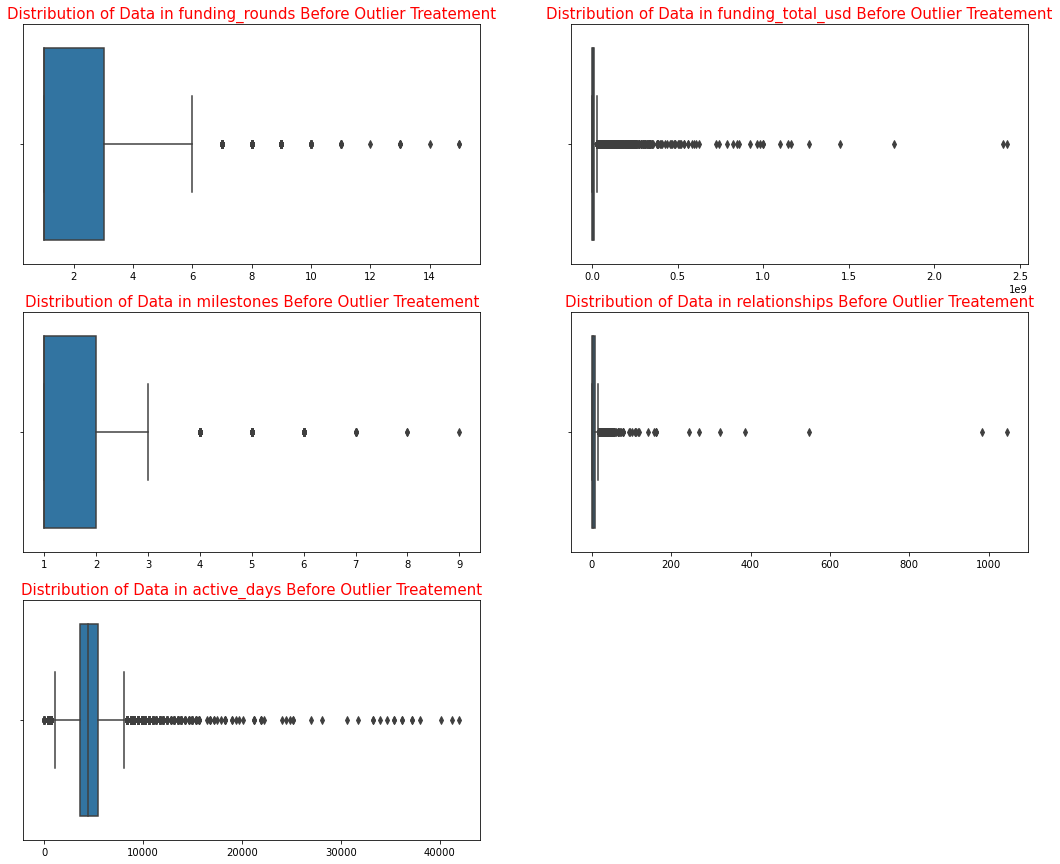

In [158]:
num_col=['funding_rounds','funding_total_usd','milestones','relationships','active_days']

plt.figure(figsize=(18,15))
for i, col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=df)
    plt.xlabel("")
    plt.title(f"Distribution of Data in {col} Before Outlier Treatement", color='red',  fontsize=15);

#### All the 5 columns contains Outliers. But the exstreme outliers found in only three columns, "relationships", 'active_days and "funding_total_usd". Lets use IQR method to clip these outliers.

<h3 style="color:blue">1. Outlier Treatment in "funding_total_usd_column".</h3>

In [159]:
q1 = df['funding_total_usd'].quantile(0.25)   # First quartile range
q3 = df['funding_total_usd'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_total_usd = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['funding_total_usd']<upper_bound]

First quartile range = 720000.0
Second quartile range = 12800000.0
IQR of funding_total_usd = 12080000.0
Lower Limit = -17400000.0
Upper Limit = 30920000.0


<h3 style="color:blue">2. Outlier Treatment in "relationships" column.

In [160]:
q1 = df['relationships'].quantile(0.25)   # First quartile range
q3 = df['relationships'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of relationships = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['relationships']< upper_bound]

First quartile range = 2.0
Second quartile range = 7.0
IQR of relationships = 5.0
Lower Limit = -5.5
Upper Limit = 14.5


<h3 style="color:blue">3. Outlier Treatment in "active_days" column.

In [161]:
q1 = df['active_days'].quantile(0.25)   # First quartile range
q3 = df['active_days'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of active_days = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[(df['active_days']< upper_bound) & (df['active_days']> lower_bound)]

First quartile range = 3285.0
Second quartile range = 5110.0
IQR of active_days = 1825.0
Lower Limit = 547.5
Upper Limit = 7847.5


<h3 style="color:blue">4. Outlier Treatment in "funding_rounds" column.

In [162]:
q1 = df['funding_rounds'].quantile(0.25)   # First quartile range
q3 = df['funding_rounds'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_rounds = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['funding_rounds']< upper_bound]

First quartile range = 1.0
Second quartile range = 2.0
IQR of funding_rounds = 1.0
Lower Limit = -0.5
Upper Limit = 3.5


<h3 style="color:blue">5. Outlier Treatment in "milestones" column.

In [163]:
q1 = df['milestones'].quantile(0.25)   # First quartile range
q3 = df['milestones'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_total_usd = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['milestones']< upper_bound]

First quartile range = 1.0
Second quartile range = 2.0
IQR of funding_total_usd = 1.0
Lower Limit = -0.5
Upper Limit = 3.5


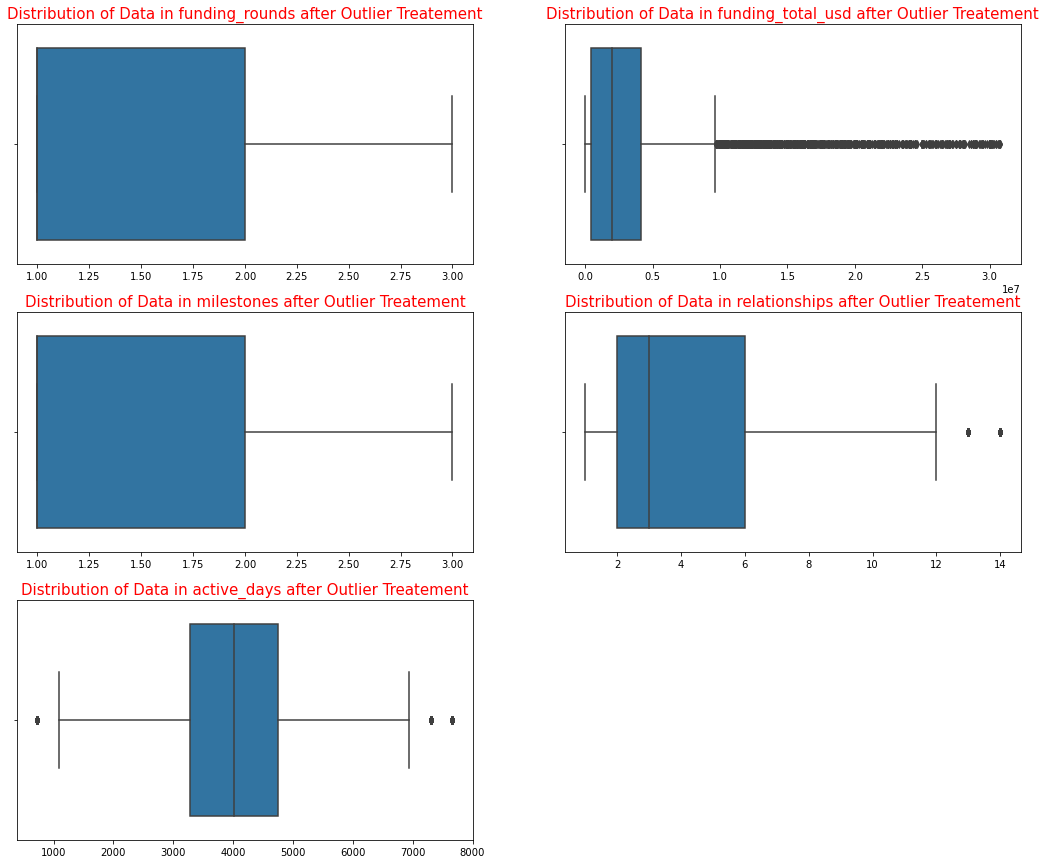

In [164]:
plt.figure(figsize=(18,15))
for i, col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=df)
    plt.xlabel("")
    plt.title(f"Distribution of Data in {col} after Outlier Treatement", color='red',  fontsize=15);

### Check for duplicates and missing values and save this dataset for further analysis and model building.

In [166]:
df.duplicated().sum()

8

In [167]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [168]:
df.isna().sum()

category_code         0
status                0
founded_at            0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
active_days           0
dtype: int64

In [169]:
df.to_csv('data/clean_data.csv', index=False)

In [84]:
df=pd.read_csv("data/clean_data.csv")
df.head()

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
0,cleantech,operating,2003,USA,2011,2012,3,10125293.0,2010,2010,1,6,30.267153,-97.743061,6570.0
1,mobile,operating,2003,AUS,2003,2003,1,250000.0,2007,2007,1,2,-27.469771,153.025124,6570.0
2,enterprise,operating,2004,USA,2011,2011,1,1500000.0,2010,2010,1,8,47.610150,-122.201516,6205.0
3,web,operating,2006,USA,2007,2007,1,2500000.0,2010,2012,2,7,37.774929,-122.419415,5475.0
4,ecommerce,operating,2004,USA,2011,2011,1,3800000.0,2012,2012,1,9,47.610150,-122.201516,6205.0


In [85]:
df.shape

(8713, 15)

<h3 style="color:blue;">Descriptive Statistics after data cleaning

In [172]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
founded_at,8713.0,2009.19,3.02,1989.00,2008.00,2010.00,2011.00,2014.00
first_funding_at,8713.0,2010.74,2.16,1974.00,2010.00,2011.00,2012.00,2013.00
last_funding_at,8713.0,2011.34,1.96,1974.00,2011.00,2012.00,2013.00,2013.00
funding_rounds,8713.0,1.50,0.69,1.00,1.00,1.00,2.00,3.00
funding_total_usd,8713.0,4083567.40,5761437.71,291.00,400000.00,2000000.00,4100000.00,30800000.00
first_milestone_at,8713.0,2010.66,2.62,1976.00,2010.00,2011.00,2012.00,2014.00
last_milestone_at,8713.0,2011.20,2.45,1976.00,2011.00,2012.00,2013.00,2014.00
milestones,8713.0,1.47,0.65,1.00,1.00,1.00,2.00,3.00
relationships,8713.0,4.25,2.98,1.00,2.00,3.00,6.00,14.00
lat,8713.0,38.40,14.73,-42.88,36.71,39.89,45.50,70.92


In [173]:
df.describe(include='object').T

,count,unique,top,freq
category_code,8713,16,other,1688
status,8713,2,operating,8189
country_code,8713,10,USA,5471


<h2 style="color:red;">Observations After Cleaning the Data: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. The average number of funding rounds is around 1.7(consider as 2), with a median (50th percentile) of 1. This suggests that a most of entities had only one funding round.<br>
    2. On average, these companies were founded in 2008, with a standard deviation of 5.15 years. The founding years range from a minimum of 1908 to a maximum of 2014..<br>
    3. Companies, on average, secured their first funding in 2010, with a standard deviation of 2.35 years. The earliest recorded first funding year is 1974, while the most recent is 2013.<br>
    4. The dataset shows an average last funding year of 2011, with a standard deviation of 2.09 years. The earliest recorded last funding year is 1974, and the latest is 2013.<br>
    6. On average, companies in our dataset underwent 1.70 funding rounds, with a standard deviation of 1.07. The number of funding rounds ranges from a minimum of 1 to a maximum of 15.<br>
    7. The average total funding for these companies is 5,028,844.56, with a notable standard deviation of 6,904,009.13. Funding amounts vary, starting from 291 and reaching as high as 33,600,000.<br>
    8. Companies, on average, achieved their first milestone in 2010, with a standard deviation of 2.89 years. The earliest recorded first milestone year is 1976, while the most recent is 2014.<br>
    9. The dataset shows an average last milestone year of 2011, with a standard deviation of 2.71 years. The earliest recorded last milestone year is 1976, and the latest is 2014.<br>
    10. On average, companies in our dataset accomplished 1.53 milestones, with a standard deviation of 0.74. The number of milestones ranges from a minimum of 1 to a maximum of 9.<br>
    11. Companies, on average, have 4.50 recorded relationships, with a standard deviation of 3.16. The number of relationships varies from a minimum of 1 to a maximum of 14.<br>
    12. Companies in our dataset have been active for an average of 4420 days, with a standard deviation of 2033.11. Active days range from 0 to 41245, with a median of 4015 days.</h4>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Exploratory Data Analysis 📈📉</h2>

<h2 style="color:red">1. Univariate Analysis</h2>

<h3 style="color:blue;">1.1. Count of Entities or companies in each category type.</h3>

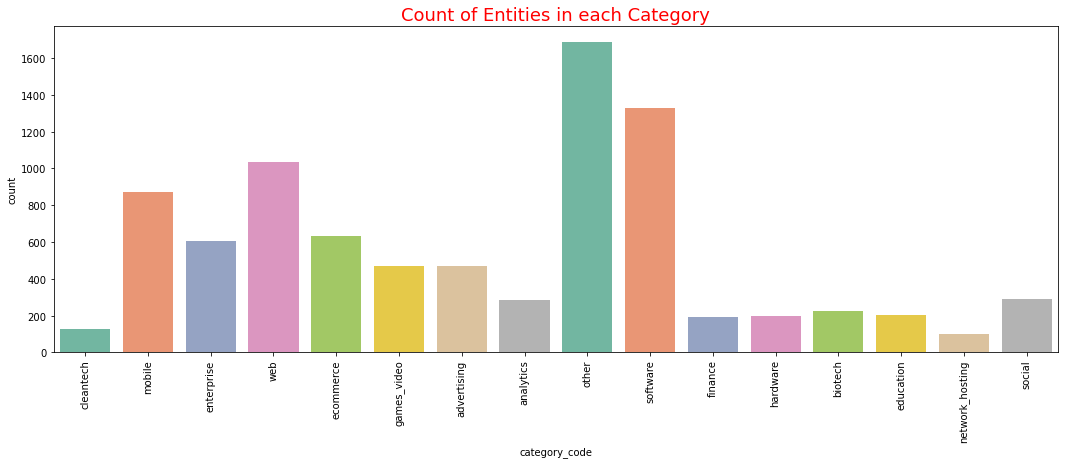

In [174]:
plt.figure(figsize=(18,6))
sns.countplot(x='category_code', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title("Count of Entities in each Category", fontsize=18, color='red');

- The most frequently occurring category is "Other," representing 2,237 instances, indicating a diverse range of businesses.
Following closely is the "Software" category with 1,590 companies, emphasizing a significant presence in the software sector.

<h3 style="color:blue;">1.2. Analyzing Acquisition Status- The Target Variable.</h3>

Text(0.5, 1.0, 'Distribution of Companies by Category')

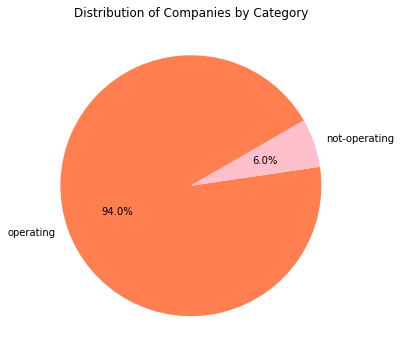

In [20]:
status_counts=df['status'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(x=status_counts.values, labels=status_counts.index, colors=['coral','pink'],
            autopct='%1.1f%%', startangle=30, counterclock=True)
plt.title('Distribution of Companies by Category')

- While the majority of companies, constituting 94.0%, are currently operating, it's important to note a class imbalance, with only 6% categorized as not-operating.

### Data is highly Imbalanced.
Dealing with highly imbalanced data is a common challenge in machine learning, as it can lead models to be biased towards the majority class. Here are several techniques to use in case of imbalanced datasets:

1. **Resampling:**
   - **Under-sampling:** Reduce the number of instances in the majority class. This can be done randomly or using more advanced techniques like Tomek links or edited nearest neighbors.
   - **Over-sampling:** Increase the number of instances in the minority class. Techniques include random duplication, SMOTE (Synthetic Minority Over-sampling Technique), and ADASYN (Adaptive Synthetic Sampling).

2. **Synthetic Data Generation:**
   - **SMOTE (Synthetic Minority Over-sampling Technique):** It generates synthetic examples for the minority class by interpolating between existing minority class instances.
   - **ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE but adds synthetic examples proportionally to the density of the minority class.

3. **Ensemble Methods:**
   - Use ensemble methods like Random Forests, XGBoost, or AdaBoost, which can handle imbalanced datasets well. These models inherently provide a form of weighting to different classes.

4. **Different Evaluation Metrics:**
   - Instead of accuracy, use evaluation metrics that are more informative for imbalanced datasets, such as precision, recall, F1-score, or the area under the precision-recall curve.

5. **Algorithmic Approaches:**
   - Some algorithms are inherently more robust to imbalanced datasets. For example, decision trees and ensemble methods often perform well.

<h3 style="color:blue;">1.3. Analyzing Date Related column</h3>

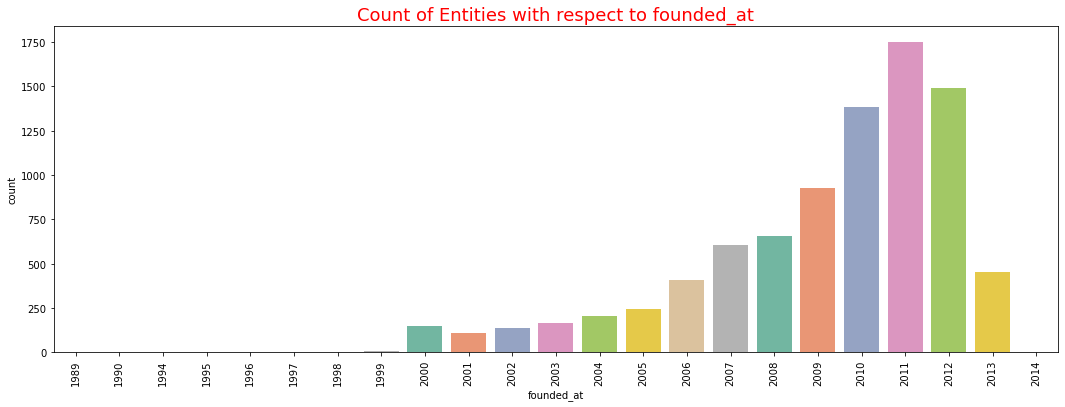

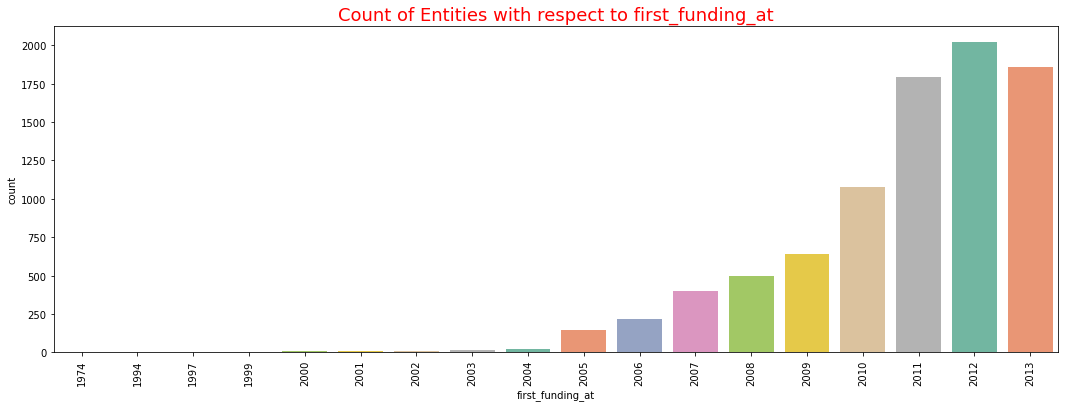

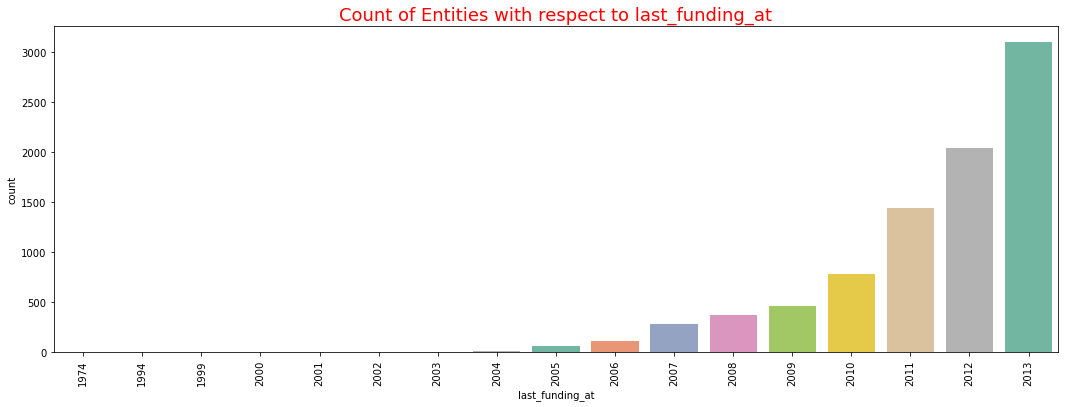

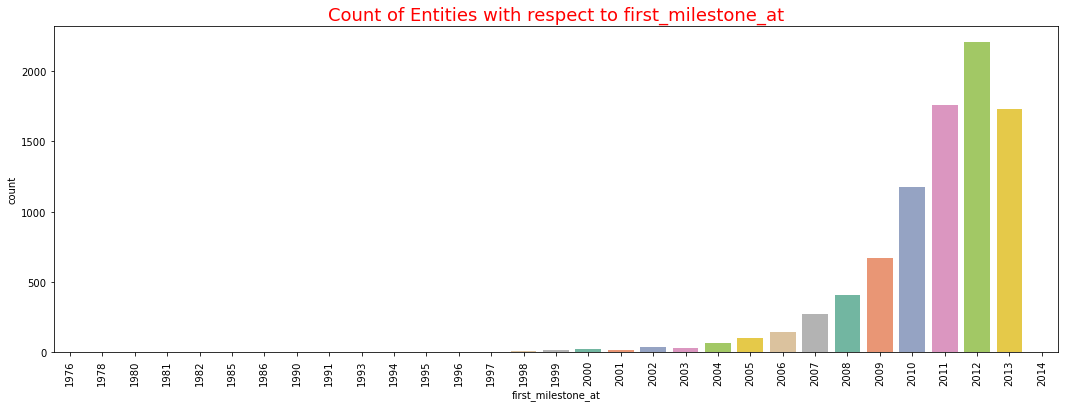

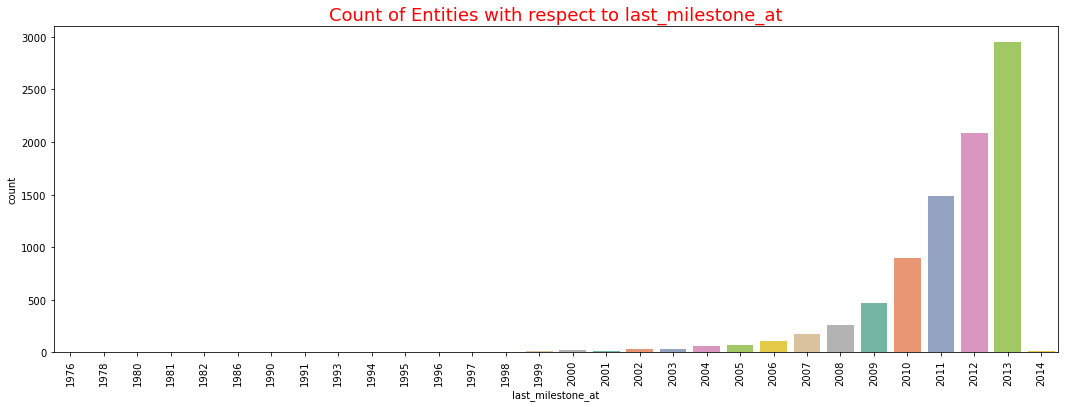

In [176]:
date_columns=['founded_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at']

for col in date_columns:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=90)
    plt.title(f"Count of Entities with respect to {col}", fontsize=18, color='red');

- Trend is from earlist to newsest in all above date related columns. Most companies founded in 2011, most companies recieved their first funding in year 2012, maximum companies recieved last funding in the year 2013. Maximum companies reached their first milestone in 2012 and the last milestone is in the year 2013.

<h3 style="color:blue;">1.4. Analyzing Location of the companies.</h3>

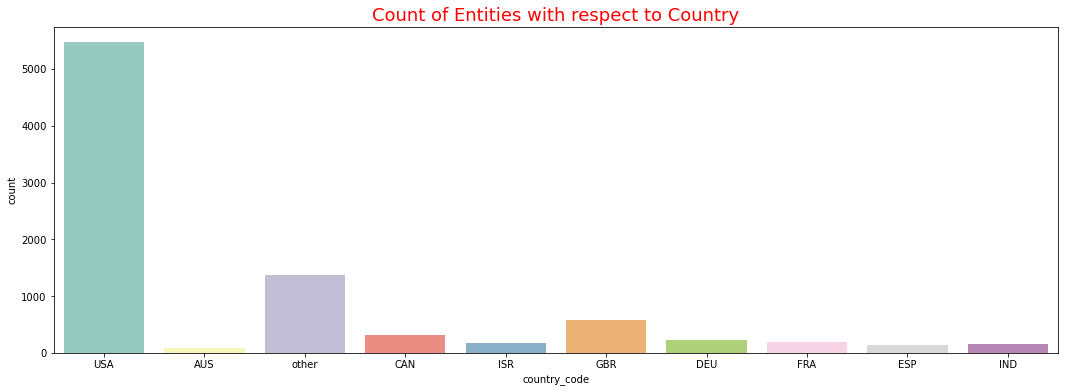

In [177]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_code', data=df, palette='Set3')
plt.title("Count of Entities with respect to Country", fontsize=18, color='red');

- Most of the entities or the copanies resides in USA, followed by Other country.

<h3 style="color:blue;">1.5. Analyzing Distribution of Numerical Columns</h3>

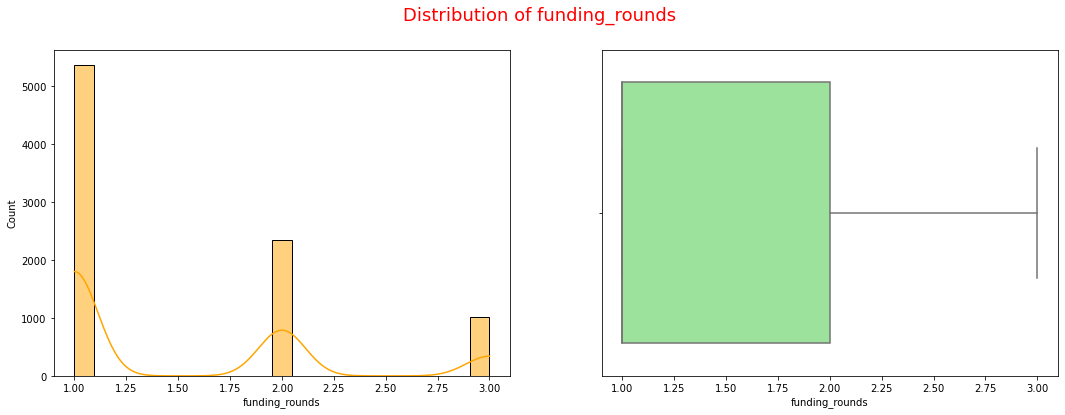

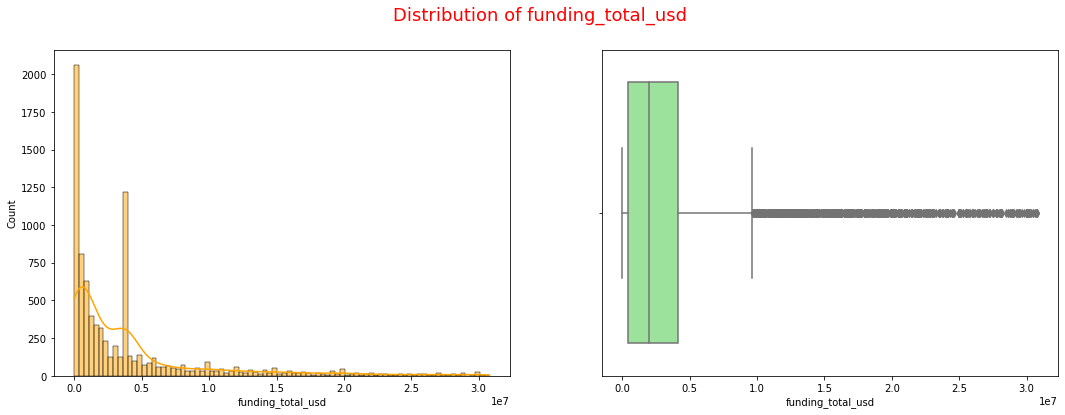

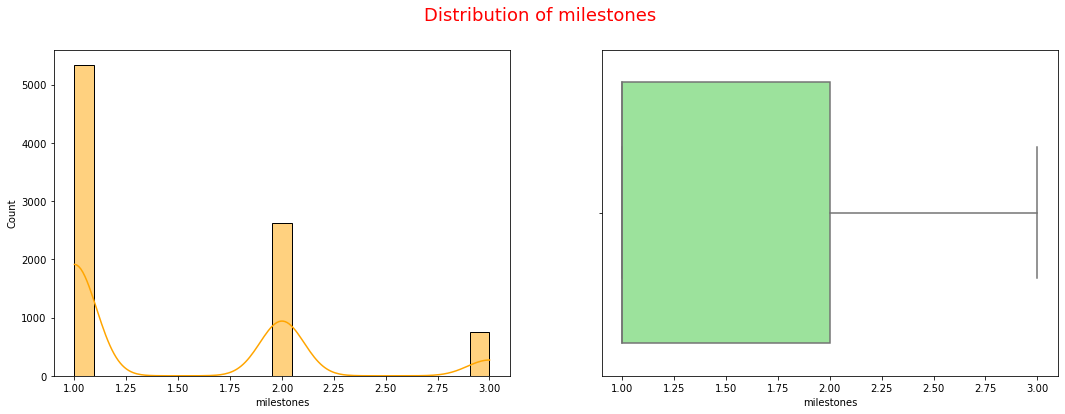

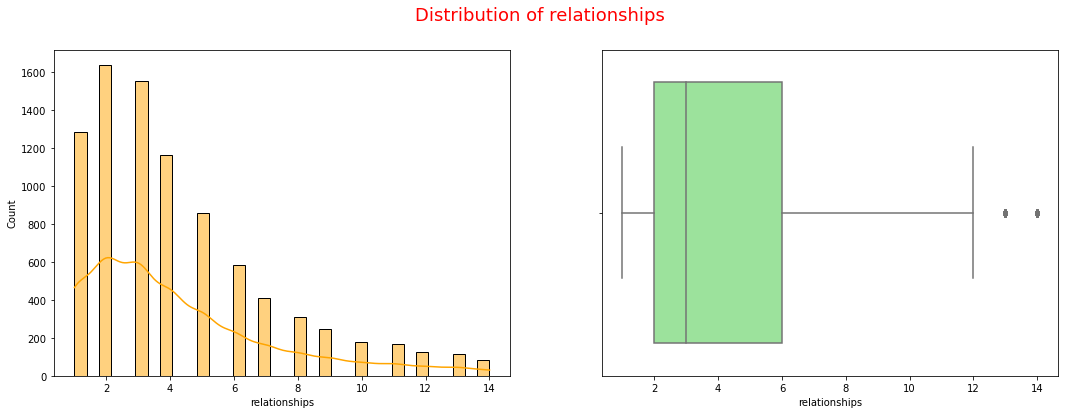

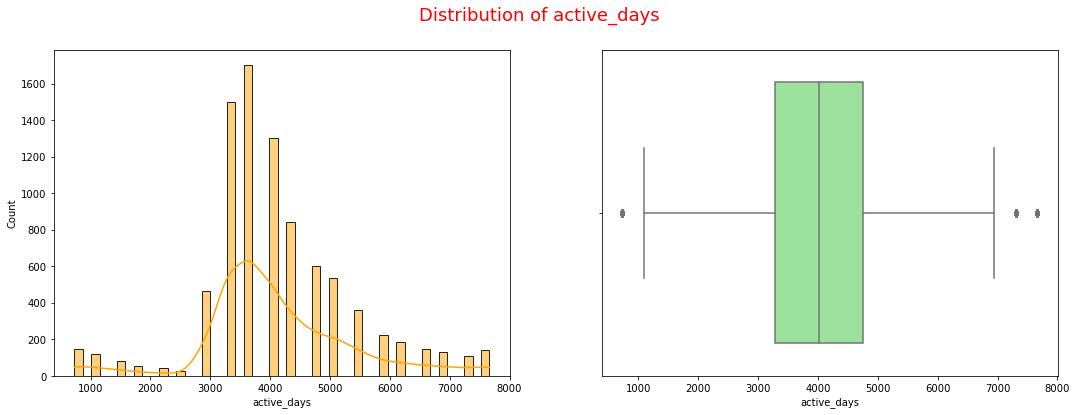

In [178]:
num_cols=['funding_rounds','funding_total_usd','milestones', 'relationships','active_days']

for col in num_cols:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x=col, data=df, kde=True, color='orange')
    
    plt.subplot(122)
    sns.boxplot(x=col, data=df, color='lightgreen')
    plt.suptitle(f"Distribution of {col}", fontsize=18, color='red');

- No large skewness in any numerical column.

<h2 style="color:red;">Observations on Univariate Analysis: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1.The most frequently occurring category is "Other," representing 2,237 instances, indicating a diverse range of businesses. Following closely is the "Software" category with 1,590 companies, emphasizing a significant presence in the software sector.<br>
    2. While the majority of companies, constituting 94.0%, are currently operating, it's important to note a class imbalance, with only 6.7% categorized as not-operating. Ensuring balanced representation in the dataset is key for robust model training and accurate predictive insights.<br>
    3. Trend is from earlist to newsest in all above date related columns. Most companies founded in 2011, most companies recieved their first funding in year 2012, maximum companies recieved last funding in the year 2013. Maximum companies reached their first milestone in 2012 and the last milestone is in the year 2013.<br>
    4. Distribution of Numerical column is not skewed, that means data is free of outliers.<br>
    5. Most of the entities or the copanies resides in USA, followed by Other country. </h4>

<h2 style="color:red">2. Bivariate Analysis</h2>

<h3 style="color:blue">2.1. Distribution of Numerical Column wrt Status</h3>

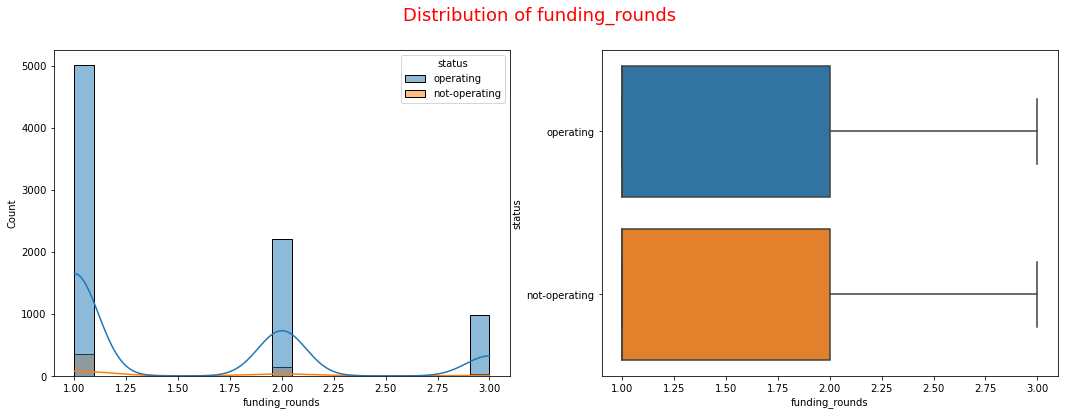

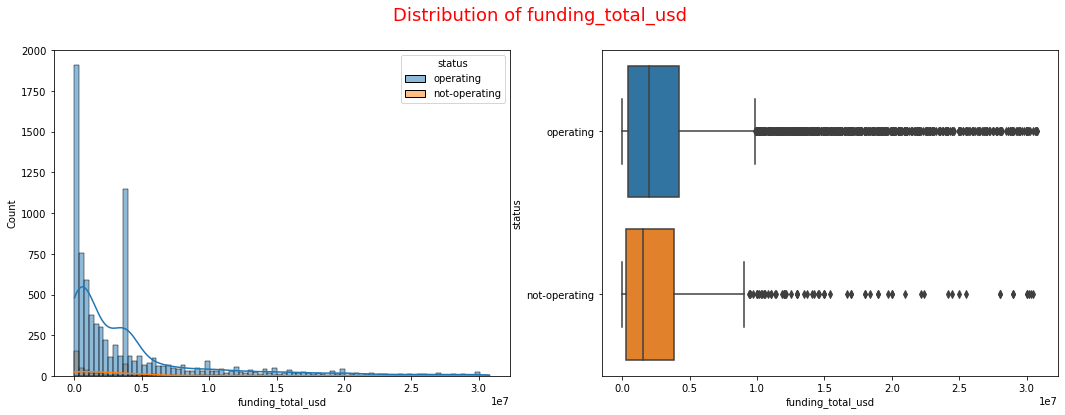

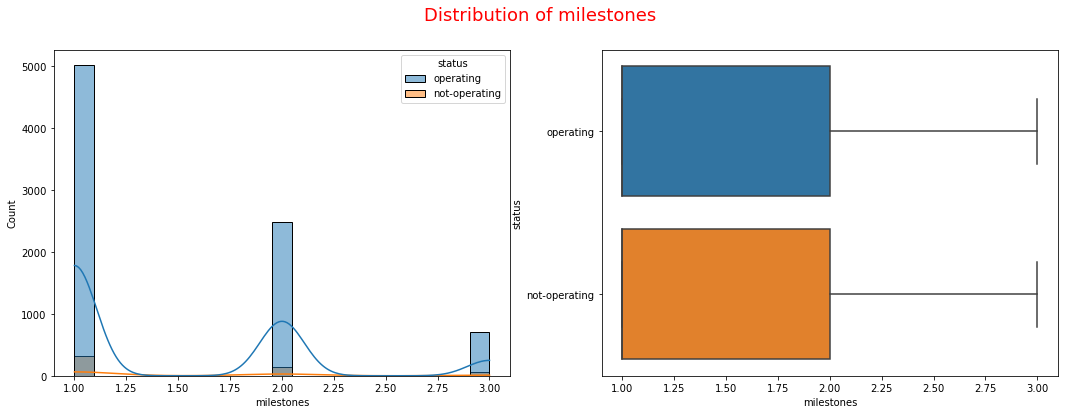

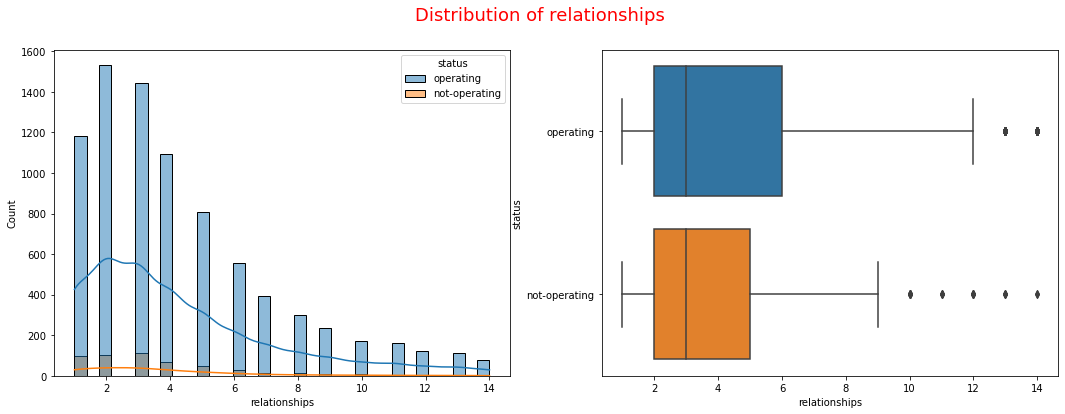

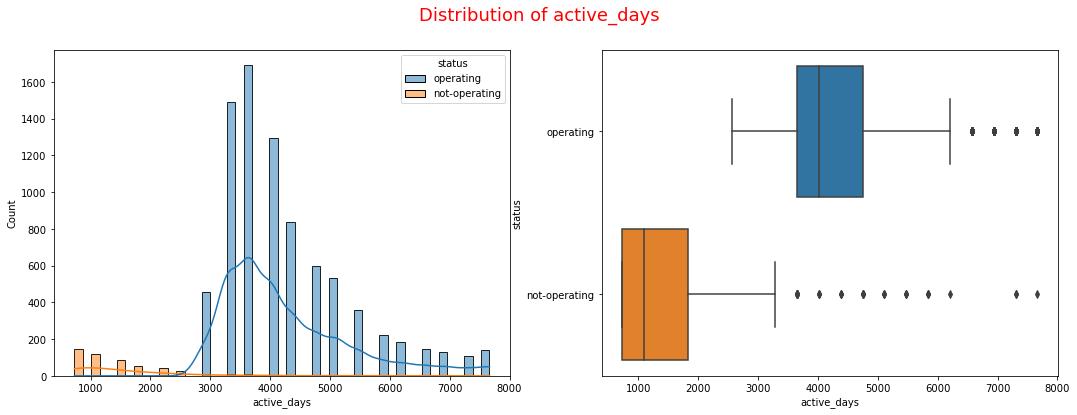

In [181]:
num_cols=['funding_rounds','funding_total_usd','milestones', 'relationships','active_days']

for col in num_cols:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x=col, hue='status', data=df, kde=True)
    
    plt.subplot(122)
    sns.boxplot(x=col, y='status', data=df)
    plt.suptitle(f"Distribution of {col}", fontsize=18, color='red');

- Only the "active_days" column can helpful to distinguish the target classes.

<h3 style="color:blue">2.2. Percentage of Status of the companies by Country.</h3>

In [199]:
status_by_country=pd.crosstab(index=df['country_code'], columns=df['status'])
status_by_country['%_of_not-operating']=round(status_by_country['not-operating']/(status_by_country['operating']+
                                                                                  status_by_country['not-operating'])*100,2)
status_by_country['%_of_operating']=round(status_by_country['operating']/(status_by_country['operating']+
                                                                          status_by_country['not-operating'])*100,2)
status_by_country

status,not-operating,operating,%_of_not-operating,%_of_operating
country_code,,,,
AUS,4,88,4.35,95.65
CAN,18,298,5.70,94.30
DEU,14,219,6.01,93.99
ESP,3,135,2.17,97.83
FRA,10,188,5.05,94.95
GBR,29,542,5.08,94.92
IND,5,148,3.27,96.73
ISR,12,156,7.14,92.86
USA,352,5119,6.43,93.57


- In every country more the 92% of the companies are in operating condition. Only Spain has over 97.83% operating and 2.17% non-operating companies. Israil has 7.14% non-operating companies.

<h3 style="color:blue">2.3. Percentage of Status of the companies by Category.</h3>

In [211]:
status_by_category=pd.crosstab(index=df['category_code'], columns=df['status'])
status_by_category['%_of_not-operating']=round(status_by_category['not-operating']/(status_by_category['operating']+
                                                                                  status_by_category['not-operating'])*100,2)
status_by_category['%_of_operating']=round(status_by_category['operating']/(status_by_category['operating']+
                                                                          status_by_category['not-operating'])*100,2)
status_by_category

status,not-operating,operating,%_of_not-operating,%_of_operating
category_code,,,,
advertising,24,448,5.08,94.92
analytics,2,284,0.70,99.30
biotech,7,217,3.12,96.88
cleantech,5,120,4.00,96.00
ecommerce,45,586,7.13,92.87
education,1,200,0.50,99.50
enterprise,21,587,3.45,96.55
finance,7,185,3.65,96.35
games_video,49,421,10.43,89.57


- Over more than 10% of "Network_Hosting", "Web" and "Games_Video" category companies are in'non-operating' condition. More than 99% of "Analytics" and "Education" type companies are in 'operating' condition.

<h3 style="color:blue">2.4. Realtionship Between "funding_total_usd" and "active_days".

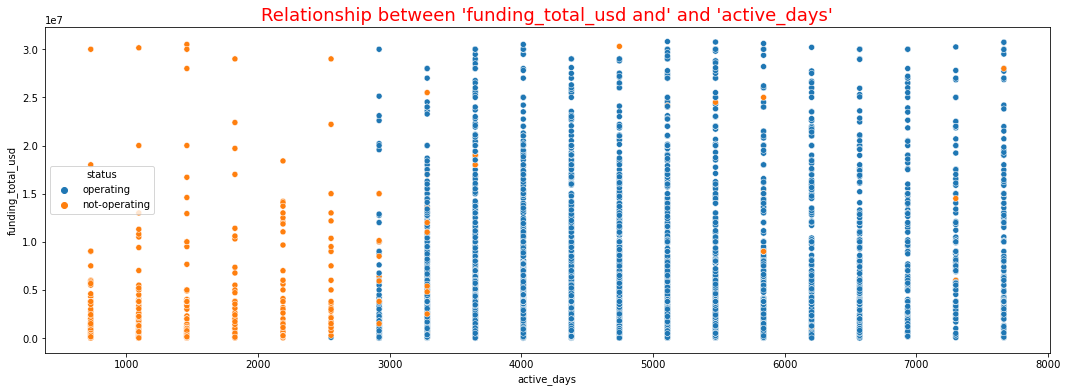

In [210]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='active_days', y='funding_total_usd', hue='status', data=df)
plt.title("Relationship between 'funding_total_usd and' and 'active_days'", fontsize=18, color='red');

- We can see clear relationship between 'active_days' of the company and 'total_funding_usd'. "Non-Operating" companies got less funding than the "operating" companies. Only finger counting companies are in 'non-operating' condition even recieving large amount of finding. Most of the 'non-operating' companies are 'active' only for maximum of 2800 Days.

<h3 style="color:blue">2.5. Operating Status of the companies by Date Column.

<h3 style="color:blue">2.5.1. Operating Status of the companies by 'founded_at' Column.

In [215]:
status_by_founded_at=pd.crosstab(index=df['founded_at'], columns=df['status'])
status_by_founded_at['%_of_not-operating']=round(status_by_founded_at['not-operating']/(status_by_founded_at['operating']+
                                                                                  status_by_founded_at['not-operating'])*100,2)
status_by_founded_at['%_of_operating']=round(status_by_founded_at['operating']/(status_by_founded_at['operating']+
                                                                          status_by_founded_at['not-operating'])*100,2)
status_by_founded_at

status,not-operating,operating,%_of_not-operating,%_of_operating
founded_at,,,,
1989,1,0,100.00,0.00
1990,2,0,100.00,0.00
1994,1,0,100.00,0.00
1995,2,0,100.00,0.00
1996,1,0,100.00,0.00
1997,2,0,100.00,0.00
1998,3,0,100.00,0.00
1999,9,0,100.00,0.00
2000,6,141,4.08,95.92


- All Companies which are founded between year "1989 to 1999" are 'non-operating'. And all companies which are founded in 2012, 2013 and 2014 are in 'operating' condition.

<h3 style="color:blue">2.5.2. Operating Status of the companies by 'first_funding_at' and 'last_funding_at' Column.

In [224]:
status_by_first_funding_at=pd.crosstab(index=df['first_funding_at'], columns=df['status']).T
status_by_first_funding_at

first_funding_at,1974,1994,1997,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
status,,,,,,,,,,,,,,,,,,
not-operating,0,0,0,2,0,0,1,1,3,21,32,75,84,101,101,79,22,2
operating,1,1,1,0,9,8,6,13,18,128,184,327,412,539,974,1714,2000,1854


In [225]:
status_by_last_funding_at=pd.crosstab(index=df['last_funding_at'], columns=df['status']).T
status_by_last_funding_at

last_funding_at,1974,1994,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
status,,,,,,,,,,,,,,,,,
not-operating,0,0,2,0,0,0,0,0,10,21,64,79,90,115,93,47,3
operating,1,1,0,5,6,1,8,11,56,96,219,297,374,670,1349,1995,3100


- There is single company in year 1974, 1994 which got first and last funding in the same year and still in 'operating' condition.

<h3 style="color:blue">2.5.3. Operating Status of the companies by 'first_milestone_at' and 'last_milestone_at Column.

In [227]:
status_by_first_milestone_at=pd.crosstab(index=df['first_milestone_at'], columns=df['status']).T
status_by_first_milestone_at

first_milestone_at,1976,1978,1980,1981,1982,1985,1986,1990,1991,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
not-operating,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,2,2,5,1,12,12,30,48,71,94,135,79,25,3,0
operating,1,1,1,2,2,1,2,5,1,2,5,3,2,2,9,13,24,13,34,32,54,90,115,227,335,574,1041,1682,2184,1727,5


In [226]:
status_by_last_milestone_at=pd.crosstab(index=df['last_milestone_at'], columns=df['status']).T
status_by_last_milestone_at

last_milestone_at,1976,1978,1980,1981,1982,1986,1990,1991,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
not-operating,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,4,1,8,7,23,30,46,82,124,115,48,29,0
operating,1,1,1,2,2,2,3,1,1,2,2,1,1,6,11,20,8,27,27,51,68,85,146,213,388,775,1370,2035,2924,15


- All Companies who reached their 'first and last milestone' between year 1976 to 1997' are in 'operating' condition. There is only one year in 21st century (2014) where all the companies reached their first and last milestone are still in operation.

<h3 style="color:blue">2.6. Location wise status of acquisition.</h3>

In [18]:
fig = px.scatter_geo(df, lat='lat', lon='lng',color='status',
                     hover_name='country_code', hover_data='status',
                     title='Companies or Entities by Longitude and Latitude And Status', 
                     projection='equirectangular') 

fig.show()

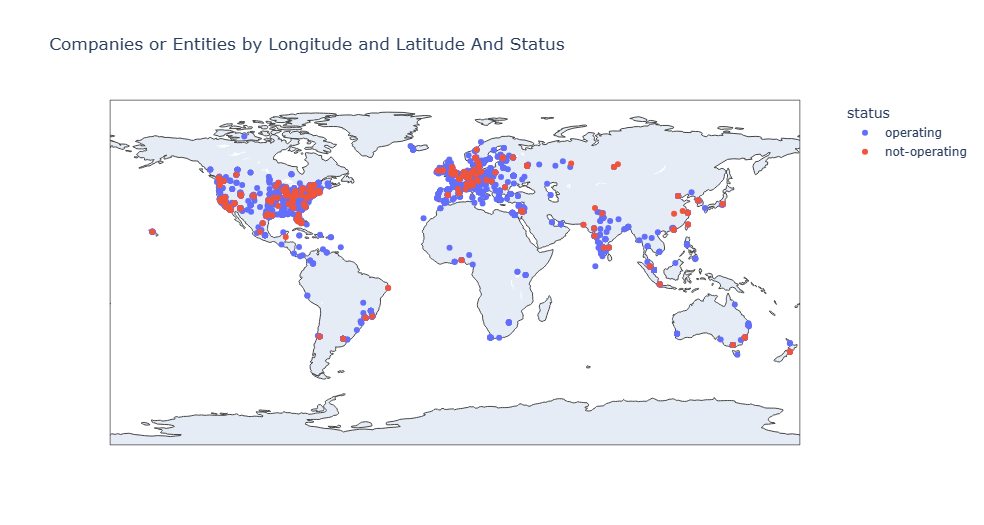

- From map we can easily see the count of companies are more in USA and Western Europe countries.

<h3 style="color:blue">2.7. Count of Type of Company in Each Country.</h3>

In [21]:
pd.crosstab(index=df['category_code'], columns=df['country_code']).T

category_code,advertising,analytics,biotech,cleantech,ecommerce,education,enterprise,finance,games_video,hardware,mobile,network_hosting,other,social,software,web
country_code,,,,,,,,,,,,,,,,
AUS,6,0,1,0,8,3,7,0,7,3,14,2,16,5,8,12
CAN,24,11,8,4,14,7,29,4,18,11,29,3,41,11,63,39
DEU,9,6,4,4,21,4,11,6,16,3,33,3,50,6,33,24
ESP,7,2,2,0,25,2,8,4,8,2,10,3,27,11,15,12
FRA,11,5,3,0,25,2,13,2,9,3,19,4,31,6,39,26
GBR,29,19,8,9,50,4,36,16,39,8,54,10,124,19,75,71
IND,6,4,1,3,22,8,9,4,3,3,12,0,30,3,23,22
ISR,13,9,1,2,9,3,15,1,16,2,20,3,31,7,21,15
USA,289,193,173,92,313,141,410,120,272,138,525,59,1070,151,869,656


### Useful Insights from above cross tabular report:
1. The USA has the highest number of companies across almost all categories. Other countries, such as the United Kingdom (GBR) and Canada (CAN), also have a significant presence in various categories.
2. "Software" and "E-commerce" are among the most popular categories across all countries, with the USA leading in these sectors. The "Other" category also shows notable activity, suggesting a diverse range of industries or startups.
3. Some countries exhibit specialization in specific categories; for example, Israel (ISR) has a relatively higher concentration in "Enterprise" and "Security."
4. Categories like "Biotech," "Cleantech," and "Analytics" have a presence across different countries, indicating a focus on emerging and innovative technologies.

<h3 style="color:blue">2.8. Which country secured the highest number of funding rounds?</h3>

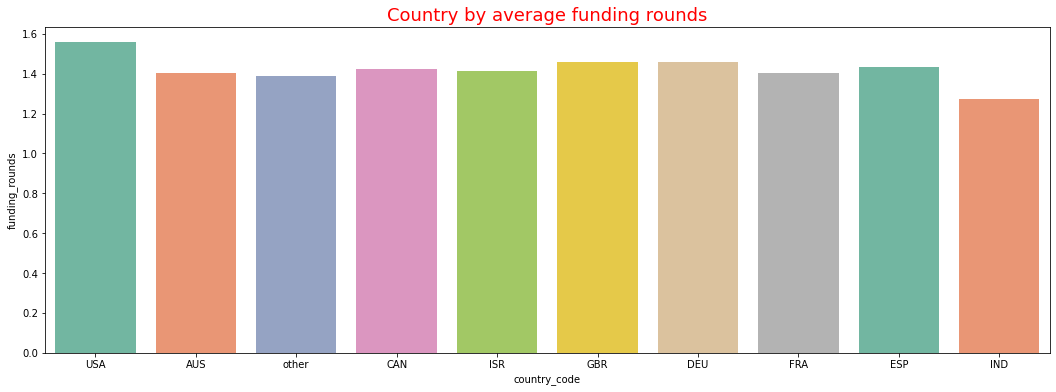

In [38]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='funding_rounds', data=df, ci=None, palette='Set2')
plt.title("Country by average funding rounds", fontsize=18, color='red');

- The United States (USA) stands out with the highest average number of funding rounds per company (approximately 1.56).
- Emerging market India (IND) shows least average funding rounds per company of approximately 1.27.

<h3 style="color:blue">2.9. Funding totals in USD categorized by country.</h3>

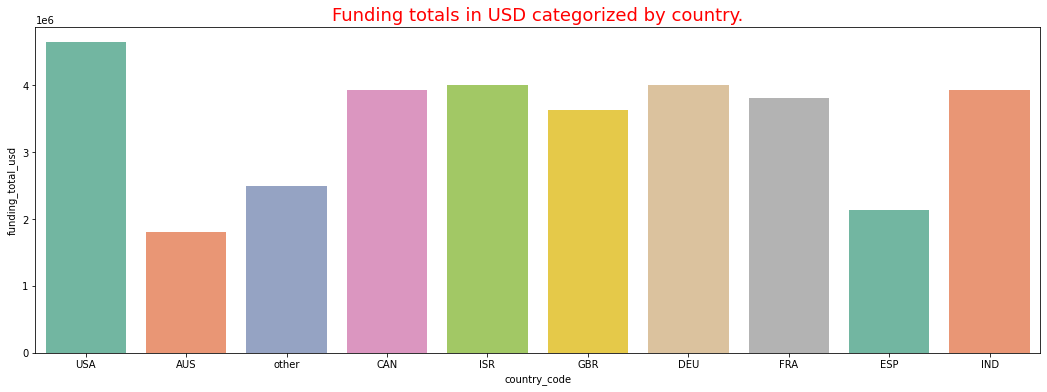

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='funding_total_usd', data=df, ci=None, palette='Set2')
plt.title("Funding totals in USD categorized by country.", fontsize=18, color='red');

- The United States (USA) is the top recipient of funding, with a total of $4.64 million USD. Australia (AUS) and Spain (ESP)  have least average funding totals.

<h3 style="color:blue">2.10. Milenstones achieved and average businees relationships categorized by country.</h3>

In [46]:
pd.pivot_table(data=df, index='country_code',
               values=['milestones','relationships']).sort_values(by='milestones').round(2).T

country_code,IND,ESP,FRA,other,AUS,DEU,CAN,ISR,GBR,USA
milestones,1.25,1.34,1.39,1.40,1.40,1.41,1.44,1.45,1.48,1.51
relationships,3.21,3.25,3.29,3.54,3.72,3.18,4.07,4.06,3.93,4.62


- India (IND) has the least average number of milestones per company (1.25), USA has highest number of milestones(1.51) and also the maximum relationships with businesess(4.62) per company.

<h3 style="color:blue">2.11. "The average active days of the company vary by country."</h3>

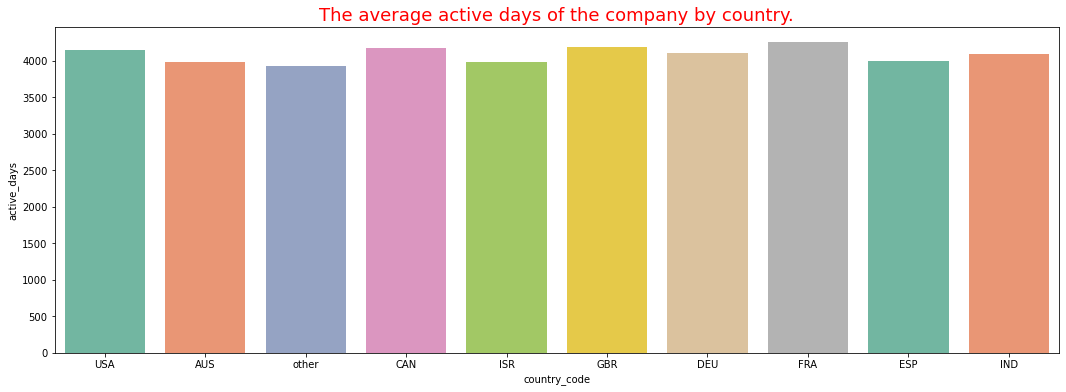

In [48]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='active_days', data=df, ci=None, palette='Set2')
plt.title("The average active days of the company by country.", fontsize=18, color='red');

- Companies in France (FRA) and the United Kingdom (GBR) demonstrate longer active days, with values of 4252.80 and 4181.84, respectively. This suggests a potentially longer operational longevity.

<h3 style="color:blue">2.12. Which category company secured the highest number of funding rounds?.</h3>

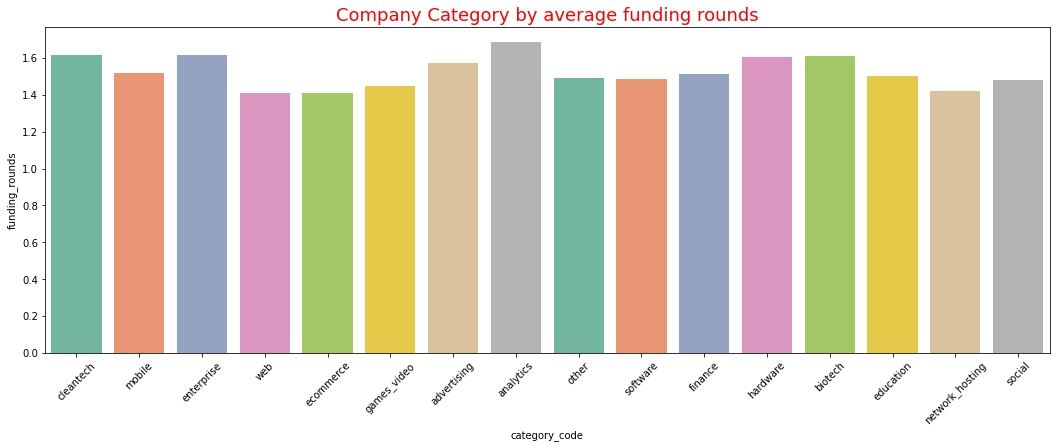

In [52]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='funding_rounds', data=df, ci=None, palette='Set2')
plt.xticks(rotation=45)
plt.title("Company Category by average funding rounds", fontsize=18, color='red');

- The Analytics compananies stands out with the highest average number of funding rounds per company (approximately 1.7).
- Web category companies shows least average funding rounds per company of approximately 1.4.

<h3 style="color:blue">2.13. Funding totals in USD categorized by company type.</h3>

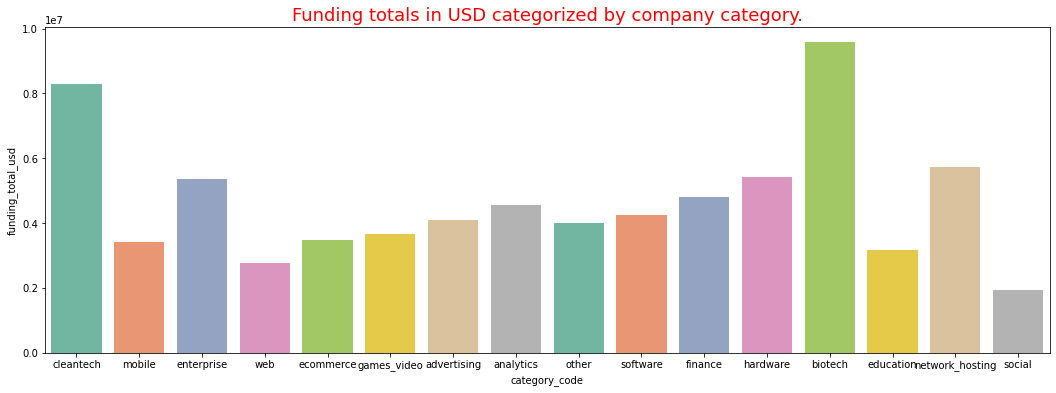

In [54]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='funding_total_usd', data=df, ci=None, palette='Set2')
plt.title("Funding totals in USD categorized by company category.", fontsize=18, color='red');

- Maximum average funding recieved by BioTech" followed by "DeanTech" companies and Least average funding is by "Social" companies.

<h3 style="color:blue">2.14. Milenstones achieved and average businees relationships categorized by company category.

In [58]:
pd.pivot_table(data=df, index='category_code',
               values=['milestones','relationships']).sort_values(by='milestones').round(2)

,milestones,relationships
category_code,,
biotech,1.14,4.18
cleantech,1.27,3.98
hardware,1.35,3.54
ecommerce,1.36,3.65
software,1.42,4.36
other,1.44,4.00
network_hosting,1.44,4.39
social,1.45,3.72
education,1.46,3.93


- Web copanies reached more "milestones" (1.59) and Biotech reached least milestones (1.14) per company. Enterprise companies has more relationships (5.16) per company and Hardwares has least relationships(3.54) per company.

<h3 style="color:blue">2.15. "The average active days of the company vary by each category company."

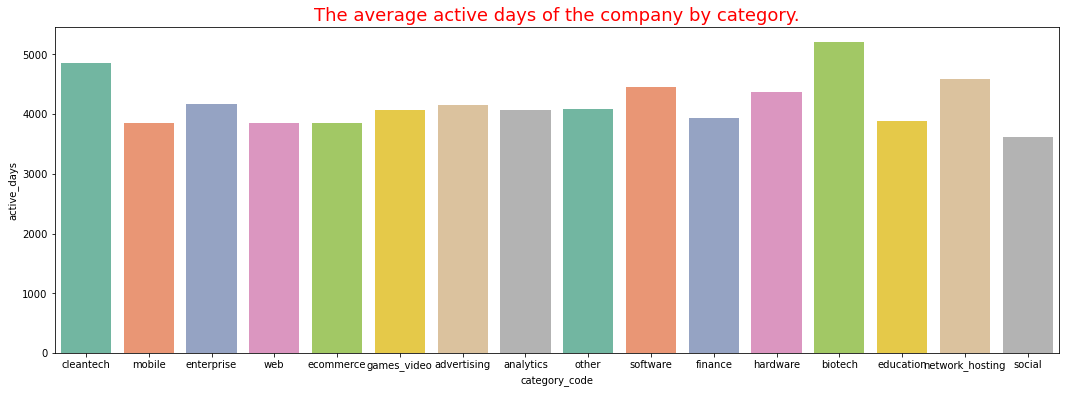

In [60]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='active_days', data=df, ci=None, palette='Set2')
plt.title("The average active days of the company by category.", fontsize=18, color='red');

- "BioTech" followed by "DeanTech" companies "operating most days" and Least operating companies belongs to "Social" category.

<h3 style="color:blue">2.16. Funding in USD by Countries and Status</h3>

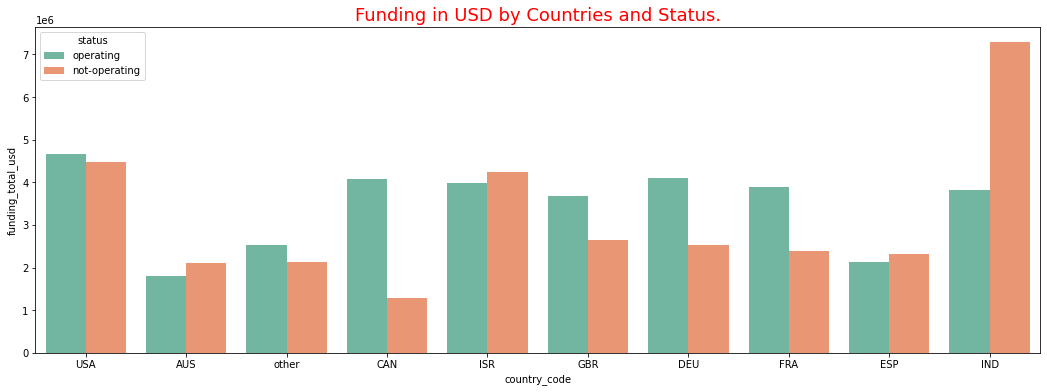

In [65]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='funding_total_usd', hue='status', data=df, ci=None, palette='Set2')
plt.title("Funding in USD by Countries and Status.", fontsize=18, color='red');

- In India most average funding recieved by non-operating companies than operating companies, Same in case of Isril, Spain and Australia.

<h3 style="color:blue">2.17. Funding in USD by Categories and Status</h3>

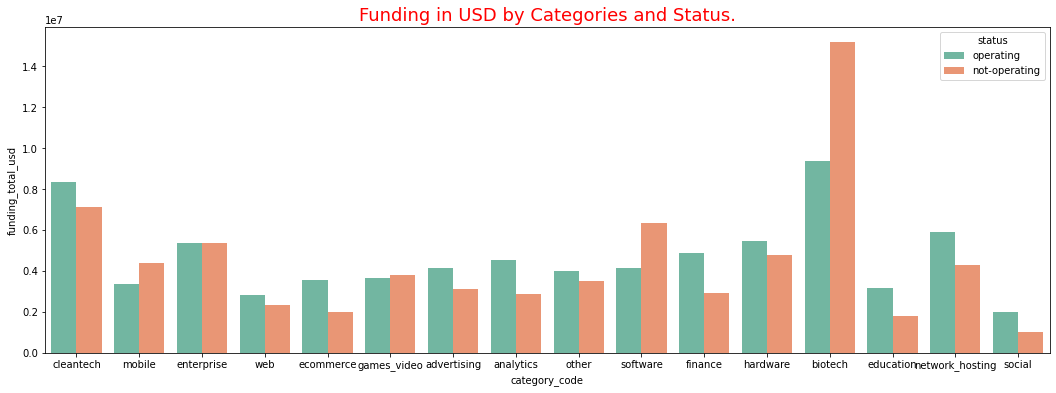

In [64]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='funding_total_usd', hue='status', data=df, ci=None, palette='Set2')
plt.title("Funding in USD by Categories and Status.", fontsize=18, color='red');

- "Biotech", "Games Videos", "Softwares" and "Mobile" companies who are not-operating have high funding than operating companies.

<h2 style="color:red;">Observations on Bivariate Analysis: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. Only the "active_days" column can helpful to distinguish the target classes..<br>
    2. In every country more the 92% of the companies are in operating condition. Only Spain has over 97.83% operating and 2.17% non-operating companies. Israil has 7.14% non-operating companies.<br>
    3. We can see clear relationship between 'active_days' of the company and 'total_funding_usd'. "Non-Operating" companies got less funding than the "operating" companies. Only finger counting companies are in 'non-operating' condition even after recieving large amount of finding. Most of the 'non-operating' companies are 'active' only for maximum of 2800 Days. This will be deciding factor.<br>
    4. Over more than 10% of "Network_Hosting", "Web" and "Games_Video" category companies are in'non-operating' condition. More than 99% of "Analytics" and "Education" type companies are in 'operating' condition.<br>
    5. All Companies which are founded between year "1989 to 1999" are 'non-operating'. And all companies which are founded in 2012, 2013 and 2014 are in 'operating' condition.<br>
    6. There is single company which got first and last funding in the same year 19976 and 1994 and still in 'operating' condition.<br>
    7. All Companies who reached their 'first and last milestone' between year 1976 to 1997' are in 'operating' condition. There is only one year in 21st century (2014) where all the companies reached their first and last milestone are still in operation.<br>
    8. The USA has the highest number of companies across almost all categories. Other countries, such as the United Kingdom (GBR) and Canada (CAN), also have a significant presence in various categories.<br>
    9. "Software" and "E-commerce" are among the most popular categories across all countries, with the USA leading in these sectors. The "Other" category also shows notable activity, suggesting a diverse range of industries or startups.<br>
    10. Some countries exhibit specialization in specific categories; for example, Israel (ISR) has a relatively higher concentration in "Enterprise" and "Security."<br>
    11. Categories like "Biotech," "Cleantech," and "Analytics" have a presence across different countries, indicating a focus on emerging and innovative technologies.<br>
    12. The United States (USA) stands out with the highest average number of funding rounds per company (approximately 1.56). Emerging market India (IND) shows least average funding rounds per company of approximately 1.27.<br>
    13. The United States (USA) is the top recipient of funding, with a total of $4.64 million USD. Australia (AUS) and Spain (ESP)  have least average funding totals.<br>
    14. India (IND) has the least average number of milestones per company (1.25), USA has highest number of milestones(1.51) and also the maximum relationships with businesess(4.62) per company.<br>
    15. Companies in France (FRA) and the United Kingdom (GBR) demonstrate longer active days, with values of 4252.80 and 4181.84, respectively. This suggests a potentially longer operational longevity.<br>
    16. The Analytics compananies stands out with the highest average number of funding rounds per company (approximately 1.7).
Web category companies shows least average funding rounds per company of approximately (1.4).<br>
    17. Maximum average funding recieved by BioTech" companies and Least average funding is by "Social" companies.<br>
    18. "BioTech" followed by "DeanTech" companies "operating most days" and Least operating companies belongs to "Social" category.<br>
    19. Web copanies reached more "milestones" (1.59) and Biotech reached least milestones (1.14) per company. Enterprise companies has more relationships (5.16) per company and Hardwares has least relationships(3.54) per company.
    20. "Biotech", "Games Videos", "Softwares" and "Mobile" companies who are not-operating have high funding than operating companies. In India most average funding recieved by non-operating companies than operating companies, Same in case of Isril, Spain and Australia.</h4>

<h2 style="color:red">3. Multivariate Analysis</h2>

<h3 style="color:blue">3.1. Correlation Matrix</h3>

In [87]:
df.rename({'status':'isClosed'}, axis=1, inplace=True)
df['isClosed'].replace({'operating':0,'not-operating':1}, inplace=True)

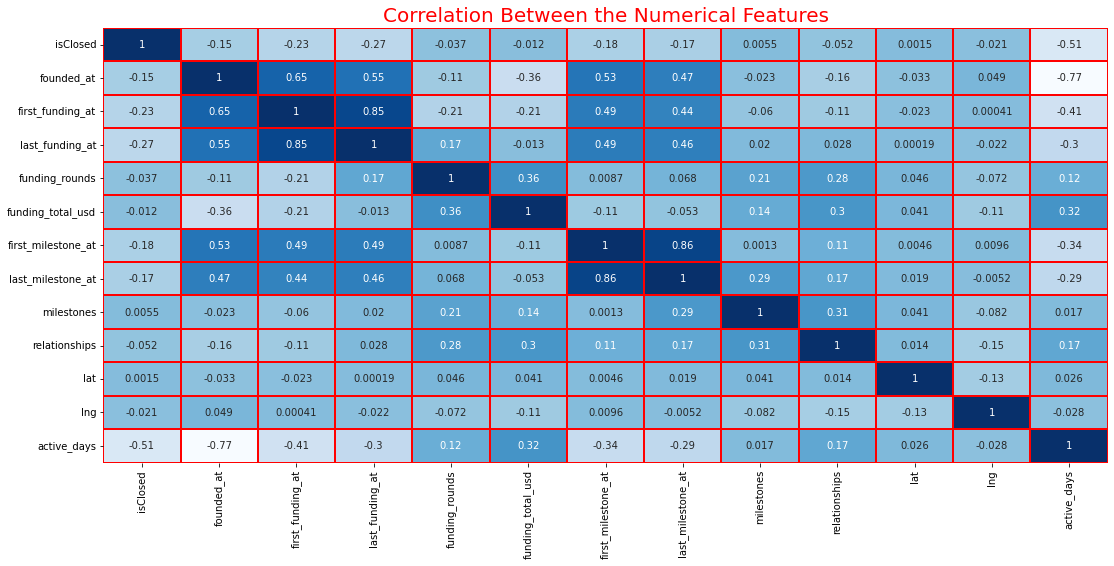

In [91]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', cbar=False,
            linecolor='red', linewidth=2)
plt.title("Correlation Between the Numerical Features", fontsize=20, color='red');

- The stronger negative correlations (closer to -1) with "isClosed" are observed for active_days, last_funding_at, first_funding_at, and founded_at.
- The weaker negative correlations (closer to 0) include milestones, relationships, funding_rounds, funding_total_usd.
- The positive correlations (although weak) are seen with lat, lng, and milestones.

<h2 style="color:red;">Observations on Multivariate Analysis: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. "founded_at" (-0.152490): Companies that were founded more recently tend to be less likely to be closed.<br>
    2. "first_funding_at" (-0.232313): Companies that received their first funding later are less likely to be closed.<br>
    3. "last_funding_at" (-0.270808): Companies with more recent last funding rounds are less likely to be closed.<br>
    4. "active_days" (-0.505077): Longer active days are associated with a lower likelihood of closure.<br>
    5. "funding_rounds" (-0.036678): A slightly positive correlation suggests that a higher number of funding rounds is associated with a slightly higher likelihood of closure.<br>
    6. "funding_total_usd" (-0.011791): A slightly positive correlation suggests that higher total funding is associated with a slightly higher likelihood of closure.<br>
    7. "first_milestone_at" and "last_milestone_at" have negative correlations with "isClosed," indicating that companies achieving milestones more recently are less likely to be closed.<br>
    8. "relationships" has a negative correlation with "isClosed," suggesting that companies with more relationships are less likely to be closed.<br>
    9. "lat" and "lng" have relatively weak correlations with "isClosed." The geographic location may not strongly predict closure.<br>
    10. "milestones" has a positive correlation with "relationships," suggesting that companies with more relationships tend to achieve more milestones.</h4>